In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from os.path import join

In [2]:
ABCD_DIR = "/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/Data/release5.0/core/"

PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/kangaroo_aim1/"
DATA_DIR = "data/"
OUTP_DIR = "output/"

In [3]:
df1 = pd.read_csv(join(ABCD_DIR, 'physical-health/ph_y_sal_horm.csv'), index_col=[0,1], low_memory=False)
temp = pd.read_csv(join(ABCD_DIR, 'abcd-general/abcd_p_demo.csv'), index_col=[0,1], low_memory=False)
age = pd.read_csv(join(ABCD_DIR, 'abcd-general/abcd_y_lt.csv'), 
                  index_col=[0,1], 
                  low_memory=False,
                  usecols=['src_subject_id', 'eventname','interview_age'])

In [4]:
df = pd.concat([df1, temp.dropna(how='all'), age], axis=1)

In [5]:
drop = []
qc_table = pd.DataFrame(
    0,
    dtype=int,
    columns=[
        'sex_mismatch',
        'sex_missing',
        'ppt_unable',
        'refused',
        'unauth_covid',
        'discomfort_covid',
        'distancing_covid',
        'not_ABCD_approved',
        'not_collected_other',
        'sample_not_processed',
        'dhea-above_limit_contaminated',
        'dhea-below_limit_contaminated',
        'dhea-only_one_replicate',
        'dhea-two_replicates',
        
        'ert-above_limit_contaminated',
        'ert-below_limit_contaminated',
        'ert-only_one_replicate',
        'ert-two_replicates',
        
        'hse-above_limit_contaminated',
        'hse-below_limit_contaminated',
        'hse-only_one_replicate',
        'hse-two_replicates'
    ],
    index=['baseline_year_1_arm_1', '1_year_follow_up_y_arm_1',
       '2_year_follow_up_y_arm_1', '3_year_follow_up_y_arm_1',
       '4_year_follow_up_y_arm_1']
)
for i in df.index:
    pguid = i[0]
    tmpnt = i[1]
    sex = df.loc[(pguid, 'baseline_year_1_arm_1')]['demo_sex_v2']
    cap = df.loc[i]['hormone_sal_sex']
    if cap == np.nan:
        pass
    elif cap == 2.0 and sex != 1.0:
        drop.append(i)
        qc_table.at[tmpnt, 'sex_mismatch'] += 1
    elif cap == 1.0 and sex != 2.0:
        drop.append(i)
        qc_table.at[tmpnt, 'sex_mismatch'] += 1
    elif cap == 3:
        drop.append(i)
        qc_table.at[tmpnt, 'ppt_unable'] += 1
    elif cap == 4:
        drop.append(i)
        qc_table.at[tmpnt, 'refused'] += 1
    elif cap == 5:
        drop.append(i)
        qc_table.at[tmpnt, 'not_collected_other'] += 1
    elif cap == 6:
        drop.append(i)
        qc_table.at[tmpnt, 'unauth_covid'] += 1
    elif cap == 7:
        drop.append(i)
        qc_table.at[tmpnt, 'discomfort_covid'] += 1
    elif cap == 8:
        drop.append(i)
        qc_table.at[tmpnt, 'distancing_covid'] += 1
    elif cap == 9:
        drop.append(i)
        qc_table.at[tmpnt, 'not_ABCD_approved'] += 1
    else:
        pass

In [6]:
qc_table

,sex_mismatch,sex_missing,ppt_unable,refused,unauth_covid,discomfort_covid,distancing_covid,not_ABCD_approved,not_collected_other,sample_not_processed,...,dhea-only_one_replicate,dhea-two_replicates,ert-above_limit_contaminated,ert-below_limit_contaminated,ert-only_one_replicate,ert-two_replicates,hse-above_limit_contaminated,hse-below_limit_contaminated,hse-only_one_replicate,hse-two_replicates
baseline_year_1_arm_1,26,0,59,19,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
1_year_follow_up_y_arm_1,24,0,26,30,0,0,0,0,50,0,...,0,0,0,0,0,0,0,0,0,0
2_year_follow_up_y_arm_1,16,0,18,27,59,37,1,2,306,0,...,0,0,0,0,0,0,0,0,0,0
3_year_follow_up_y_arm_1,3,0,8,6,44,6,3,33,1003,0,...,0,0,0,0,0,0,0,0,0,0
4_year_follow_up_y_arm_1,5,0,10,24,152,86,36,25,198,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df = df.drop(drop, axis=0)

In [8]:
notes_cols = df.filter(like='hormon_sal_notes_y___').columns[1:]

In [9]:
df['notes'] = df[notes_cols].sum(axis=1) > 0

In [10]:
for i in df.index:
    tmpt = i[1]
    if 'qns' in list(df.loc[i][['hormone_scr_dhea_rep1', 'hormone_scr_dhea_rep2']]):
        qc_table.at[tmpt, 'sample_not_processed'] += 1
        df.at[i, 'filtered_dhea'] = np.nan
        
    else:
        rep1 = float(df.loc[i]['hormone_scr_dhea_rep1'])
        rep2 = float(df.loc[i]['hormone_scr_dhea_rep2'])
        if df.loc[i]['hormone_scr_dhea_rep1_nd'] == 1:
            rep1 = 0.
        if df.loc[i]['hormone_scr_dhea_rep2_nd'] == 1:
            rep2 = 0.
        if float(df.loc[i]['hormone_scr_dhea_rep1']) < 5. and df.loc[i]['notes'] == True:
            rep1 = np.nan
            qc_table.at[tmpt, 'dhea-below_limit_contaminated'] += 1
        elif float(df.loc[i]['hormone_scr_dhea_rep1']) > 1000. and df.loc[i]['notes'] == True:
            rep1 = np.nan
            qc_table.at[tmpt, 'dhea-above_limit_contaminated'] += 1
        if float(df.loc[i]['hormone_scr_dhea_rep2']) < 5. and df.loc[i]['notes'] == True:
            rep2 = np.nan
            qc_table.at[tmpt, 'dhea-below_limit_contaminated'] += 1
        elif float(df.loc[i]['hormone_scr_dhea_rep2']) > 1000. and df.loc[i]['notes'] == True:
            rep2 = np.nan
            qc_table.at[tmpt, 'dhea-above_limit_contaminated'] += 1
        if rep1 > 0:
            if rep2 > 0:
                df.at[i, 'filtered_dhea'] = (rep1 + rep2) / 2
                qc_table.at[tmpt, 'dhea-two_replicates'] += 1
            else:
                df.at[i, 'filtered_dhea'] = rep1
                qc_table.at[tmpt, 'dhea-only_one_replicate'] += 1
        else:
            if rep2 > 0:
                df.at[i, 'filtered_dhea'] = rep2
                qc_table.at[tmpt, 'dhea-only_one_replicate'] += 1
        rep1 = None
        rep2 = None

In [11]:
qc_table

,sex_mismatch,sex_missing,ppt_unable,refused,unauth_covid,discomfort_covid,distancing_covid,not_ABCD_approved,not_collected_other,sample_not_processed,...,dhea-only_one_replicate,dhea-two_replicates,ert-above_limit_contaminated,ert-below_limit_contaminated,ert-only_one_replicate,ert-two_replicates,hse-above_limit_contaminated,hse-below_limit_contaminated,hse-only_one_replicate,hse-two_replicates
baseline_year_1_arm_1,26,0,59,19,0,0,0,0,8,2,...,88,11291,0,0,0,0,0,0,0,0
1_year_follow_up_y_arm_1,24,0,26,30,0,0,0,0,50,0,...,79,10627,0,0,0,0,0,0,0,0
2_year_follow_up_y_arm_1,16,0,18,27,59,37,1,2,306,0,...,57,7291,0,0,0,0,0,0,0,0
3_year_follow_up_y_arm_1,3,0,8,6,44,6,3,33,1003,0,...,7,1903,0,0,0,0,0,0,0,0
4_year_follow_up_y_arm_1,5,0,10,24,152,86,36,25,198,0,...,5,2444,0,0,0,0,0,0,0,0


In [12]:
for i in df.index:
    tmpt = i[1]
    if 'qns' in list(df.loc[i][['hormone_scr_ert_rep1', 'hormone_scr_ert_rep2']]):
        qc_table.at[tmpt, 'sample_not_processed'] += 1
        df.at[i, 'filtered_ert'] = np.nan
        
    else:
        rep1 = float(df.loc[i]['hormone_scr_ert_rep1'])
        rep2 = float(df.loc[i]['hormone_scr_ert_rep2'])
        if df.loc[i]['hormone_scr_ert_rep1_nd'] == 1:
            rep1 = 0.
        if df.loc[i]['hormone_scr_ert_rep2_nd'] == 1:
            rep2 = 0.
        if float(df.loc[i]['hormone_scr_ert_rep1']) < 5. and df.loc[i]['notes'] == True:
            rep1 = np.nan
            qc_table.at[tmpt, 'ert-below_limit_contaminated'] += 1
        elif float(df.loc[i]['hormone_scr_ert_rep1']) > 1000. and df.loc[i]['notes'] == True:
            rep1 = np.nan
            qc_table.at[tmpt, 'ert-above_limit_contaminated'] += 1
        if float(df.loc[i]['hormone_scr_ert_rep2']) < 5. and df.loc[i]['notes'] == True:
            rep2 = np.nan
            qc_table.at[tmpt, 'ert-below_limit_contaminated'] += 1
        elif float(df.loc[i]['hormone_scr_ert_rep2']) > 1000. and df.loc[i]['notes'] == True:
            rep2 = np.nan
            qc_table.at[tmpt, 'ert-above_limit_contaminated'] += 1
        if rep1 > 0:
            if rep2 > 0:
                df.at[i, 'filtered_ert'] = (rep1 + rep2) / 2
                qc_table.at[tmpt, 'ert-two_replicates'] += 1
            else:
                df.at[i, 'filtered_ert'] = rep1
                qc_table.at[tmpt, 'ert-only_one_replicate'] += 1
        else:
            if rep2 > 0:
                df.at[i, 'filtered_ert'] = rep2
                qc_table.at[tmpt, 'ert-only_one_replicate'] += 1
        rep1 = None
        rep2 = None

In [13]:
for i in df.index:
    tmpt = i[1]
    if 'qns' in list(df.loc[i][['hormone_scr_hse_rep1', 'hormone_scr_hse_rep2']]):
        qc_table.at[tmpt, 'sample_not_processed'] += 1
        df.at[i, 'filtered_hse'] = np.nan
        tmpt = i[1]
    else:
        rep1 = float(df.loc[i]['hormone_scr_hse_rep1'])
        rep2 = float(df.loc[i]['hormone_scr_hse_rep2'])
        if df.loc[i]['hormone_scr_hse_rep1_nd'] == 1:
            rep1 = 0.
        if df.loc[i]['hormone_scr_hse_rep2_nd'] == 1:
            rep2 = 0.
        if float(df.loc[i]['hormone_scr_hse_rep1']) < 5. and df.loc[i]['notes'] == True:
            rep1 = np.nan
            qc_table.at[tmpt, 'hse-below_limit_contaminated'] += 1
        elif float(df.loc[i]['hormone_scr_hse_rep1']) > 1000. and df.loc[i]['notes'] == True:
            rep1 = np.nan
            qc_table.at[tmpt, 'hse-above_limit_contaminated'] += 1
        if float(df.loc[i]['hormone_scr_hse_rep2']) < 5. and df.loc[i]['notes'] == True:
            rep2 = np.nan
            qc_table.at[tmpt, 'hse-below_limit_contaminated'] += 1
        elif float(df.loc[i]['hormone_scr_hse_rep2']) > 1000. and df.loc[i]['notes'] == True:
            rep2 = np.nan
            qc_table.at[tmpt, 'hse-above_limit_contaminated'] += 1
        if rep1 > 0:
            if rep2 > 0:
                df.at[i, 'filtered_hse'] = (rep1 + rep2) / 2
                qc_table.at[tmpt, 'hse-two_replicates'] += 1
            else:
                df.at[i, 'filtered_hse'] = rep1
                qc_table.at[tmpt, 'hse-only_one_replicate'] += 1
        else:
            if rep2 > 0:
                df.at[i, 'filtered_hse'] = rep2
                qc_table.at[tmpt, 'hse-only_one_replicate'] += 1
        rep1 = None
        rep2 = None

In [14]:
df.dropna(how='all').to_pickle(join(PROJ_DIR, DATA_DIR, 'qcd_hormones.pkl'))
df.dropna(how='all').to_csv(join(PROJ_DIR, DATA_DIR, 'qcd_hormones.csv'))

In [15]:
qc_table.filter(like='replicate')

,dhea-only_one_replicate,dhea-two_replicates,ert-only_one_replicate,ert-two_replicates,hse-only_one_replicate,hse-two_replicates
baseline_year_1_arm_1,88,11291,18,11383,57,4430
1_year_follow_up_y_arm_1,79,10627,8,10663,67,4226
2_year_follow_up_y_arm_1,57,7291,2,7389,35,3012
3_year_follow_up_y_arm_1,7,1903,1,1921,5,791
4_year_follow_up_y_arm_1,5,2444,1,2456,11,964


In [16]:
for i in df.index:
    sex_num = temp.loc[i[0], 'baseline_year_1_arm_1']['demo_sex_v2']
    if sex_num == 1.0:
        df.at[i, 'demo_sex'] = 'male'
    elif sex_num == 2.0:
        df.at[i, 'demo_sex'] = 'female'
    elif sex_num == 3.0:
        pass
        #df.at[i, 'demo_sex'] = 'intersex'

In [17]:
df['subj'] = df.index.get_level_values(0)

In [18]:
sns.set(context='talk', palette='husl', style='ticks')

In [19]:
husl1 = sns.color_palette('husl', desat=0.5, n_colors=2)

husl = sns.color_palette('husl', n_colors=2)

Text(45.33925694444444, 0.5, 'Estradiol (pg/mL)')

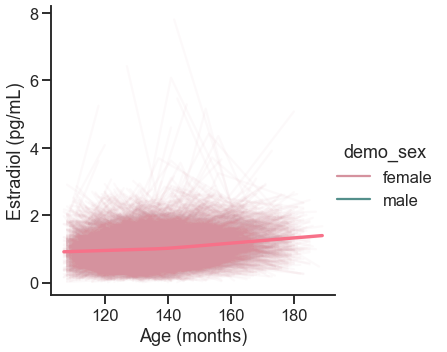

In [20]:
g = sns.relplot(
    data=df,
    kind='line',
    x='interview_age', 
    y='filtered_hse', 
    hue='demo_sex',
    units='subj',
    alpha=0.05,
    #scatter_kws={'alpha': 0.05},
    estimator=None,
    palette=husl1
)
h = sns.regplot(
    data=df[df['demo_sex'] == 'female'],
    x='interview_age', 
    y='filtered_hse', 
    #hue='demo_sex',
    scatter=False,
    lowess=True,
    ax=g.ax,
    color=husl.as_hex()[0]
)
g.ax.set_xlabel('Age (months)')
g.ax.set_ylabel('Estradiol (pg/mL)')

Text(53.63920486111111, 0.5, 'Testosterone (pg/mL)')

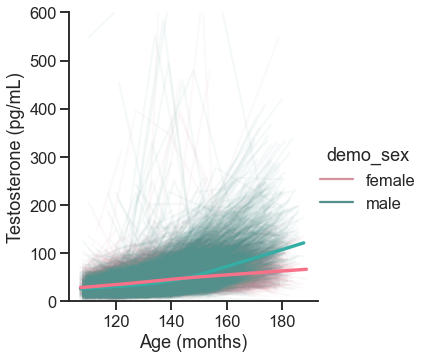

In [21]:
g = sns.relplot(
    data=df,
    kind='line',
    x='interview_age', 
    y='filtered_ert', 
    hue='demo_sex',
    units='subj',
    alpha=0.05,
    #scatter_kws={'alpha': 0.05},
    estimator=None,
    palette=husl1
)
g.ax.set_ylim((0,600))
h = sns.regplot(
    data=df[df['demo_sex'] == 'male'],
    x='interview_age', 
    y='filtered_ert', 
    #hue='demo_sex',
    scatter=False,
    lowess=True,
    ax=g.ax,
    color=husl.as_hex()[1]
)

h = sns.regplot(
    data=df[df['demo_sex'] == 'female'],
    x='interview_age', 
    y='filtered_ert', 
    #hue='demo_sex',
    scatter=False,
    lowess=True,
    ax=g.ax,
    color=husl.as_hex()[0]
)
g.ax.set_xlabel('Age (months)')
g.ax.set_ylabel('Testosterone (pg/mL)')

Text(53.63920486111111, 0.5, 'DHEA (pg/mL)')

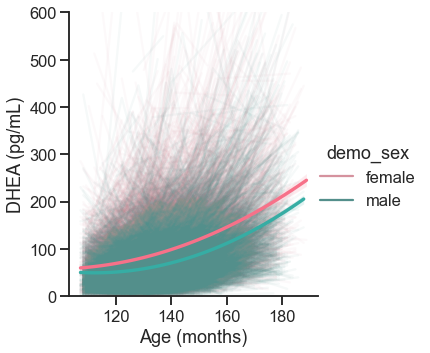

In [22]:
g = sns.relplot(
    data=df,
    kind='line',
    x='interview_age', 
    y='filtered_dhea', 
    hue='demo_sex',
    units='subj',
    alpha=0.05,
    #scatter_kws={'alpha': 0.05},
    estimator=None,
    palette=husl1
)
g.ax.set_ylim((0,600))
h = sns.regplot(
    data=df[df['demo_sex'] == 'male'],
    x='interview_age', 
    y='filtered_dhea', 
    #hue='demo_sex',
    scatter=False,
    #lowess=True,
    order=2,
    ax=g.ax,
    color=husl.as_hex()[1]
)

h = sns.regplot(
    data=df[df['demo_sex'] == 'female'],
    x='interview_age', 
    y='filtered_dhea', 
    #hue='demo_sex',
    scatter=False,
    #lowess=True,
    order=2,
    ax=g.ax,
    color=husl.as_hex()[0]
)
g.ax.set_xlabel('Age (months)')
g.ax.set_ylabel('DHEA (pg/mL)')

Text(45.33925694444444, 0.5, 'Estradiol (pg/mL)')

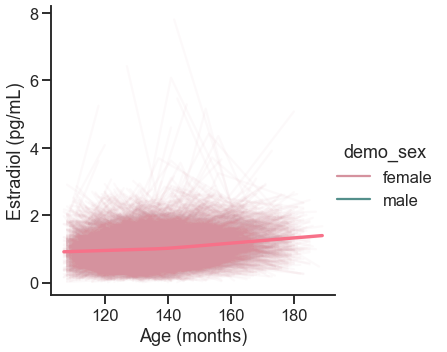

In [23]:
g = sns.relplot(
    data=df,
    kind='line',
    x='interview_age', 
    y='filtered_hse', 
    hue='demo_sex',
    units='subj',
    alpha=0.05,
    #scatter_kws={'alpha': 0.05},
    estimator=None,
    palette=husl1
)
#g.ax.set_ylim((0,600))


h = sns.regplot(
    data=df[df['demo_sex'] == 'female'],
    x='interview_age', 
    y='filtered_hse', 
    #hue='demo_sex',
    scatter=False,
    lowess=True,
    ax=g.ax,
    color=husl.as_hex()[0]
)
g.ax.set_xlabel('Age (months)')
g.ax.set_ylabel('Estradiol (pg/mL)')


In [24]:
len(df[df['demo_sex'] == 'male']['filtered_hse'].dropna().index)

53

Text(0.5, 0, 'DHEA (pg/mL)')

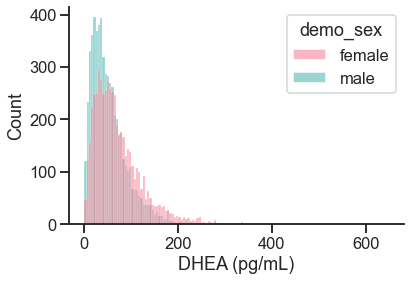

In [25]:
g = sns.histplot(
    df.swaplevel(0).loc['baseline_year_1_arm_1'], 
    x='filtered_dhea',
    hue='demo_sex',
    fill=True,
    #palette='Set2'
    palette=husl
)
sns.despine()
g.set_xlabel('DHEA (pg/mL)')

(0.0, 200.0)

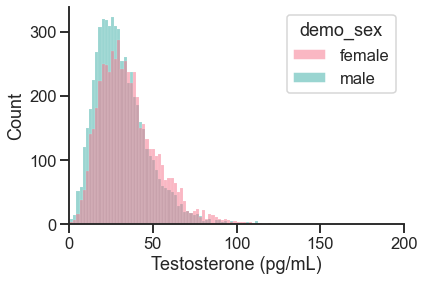

In [26]:
g = sns.histplot(
    df.swaplevel(0).loc['baseline_year_1_arm_1'], 
    x='filtered_ert',
    hue='demo_sex',
    fill=True,
    palette=husl
)
sns.despine()
g.set_xlabel('Testosterone (pg/mL)')
g.set_xlim(0,200)

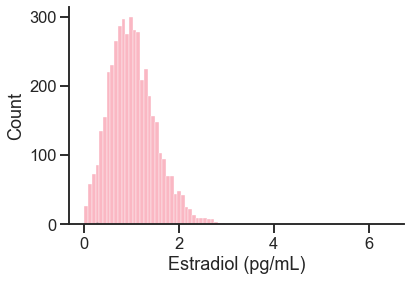

In [27]:
g = sns.histplot(
    df.swaplevel(0).loc['baseline_year_1_arm_1'], 
    x='filtered_hse',
    hue='demo_sex',
    fill=True,
    palette=husl
)
sns.despine()
g.set_xlabel('Estradiol (pg/mL)')
g.set_ylabel('Count')
g.get_legend().remove()

In [28]:
y_puberty = pd.read_csv(join(ABCD_DIR, 'physical-health', 'ph_y_pds.csv'), index_col=[0,1])
p_puberty = pd.read_csv(join(ABCD_DIR, 'physical-health', 'ph_p_pds.csv'), index_col=[0,1])

In [29]:
puberty = pd.concat([y_puberty, p_puberty], axis=1)

In [30]:
puberty.swaplevel(0).loc['baseline_year_1_arm_1'].corr()['pds_p_ss_female_category_2']['pds_y_ss_female_category_2']

/var/folders/t5/4bz0680d45n5_5m30ny85m540000gp/T/ipykernel_30197/279614631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  puberty.swaplevel(0).loc['baseline_year_1_arm_1'].corr()['pds_p_ss_female_category_2']['pds_y_ss_female_category_2']


0.5416212761617166

In [31]:
puberty.swaplevel(0).loc['baseline_year_1_arm_1'].corr()['pds_p_ss_male_category_2']['pds_y_ss_male_cat_2']

/var/folders/t5/4bz0680d45n5_5m30ny85m540000gp/T/ipykernel_30197/1427883617.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  puberty.swaplevel(0).loc['baseline_year_1_arm_1'].corr()['pds_p_ss_male_category_2']['pds_y_ss_male_cat_2']


0.18793518873335427

In [32]:
puberty['timepoint'] = puberty.index.get_level_values(1)
puberty['participt'] = puberty.index.get_level_values(0)

In [33]:
big_df = pd.concat([df, puberty], axis=1)

In [34]:
big_df['pds_p_ss_category_2'] = big_df['pds_p_ss_female_category_2'].replace({np.nan: 0}) + big_df['pds_p_ss_male_category_2'].replace({np.nan: 0})
big_df['pds_p_ss_category_2'].replace({0:np.nan}, inplace=True)

In [35]:
big_df['pds_y_ss_category_2'] = big_df['pds_y_ss_female_category_2'].replace({np.nan: 0}) + big_df['pds_y_ss_male_cat_2'].replace({np.nan: 0})
big_df['pds_y_ss_category_2'].replace({0:np.nan}, inplace=True)

Text(45.68541796874999, 0.5, 'Estradiol (pg/mL)')

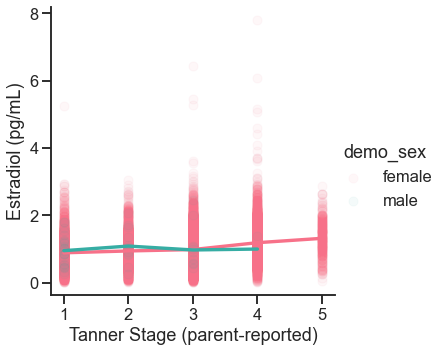

In [36]:
g = sns.lmplot(
    big_df,
    x='pds_p_ss_category_2',
    y='filtered_hse',
    hue='demo_sex',
    scatter_kws=dict(alpha=0.05),
    lowess=True,
    palette=husl
)
g.ax.set_xlabel('Tanner Stage (parent-reported)')
g.ax.set_ylabel('Estradiol (pg/mL)')

Text(0.5, 29.065625000000004, 'Tanner Stage (self-report)')

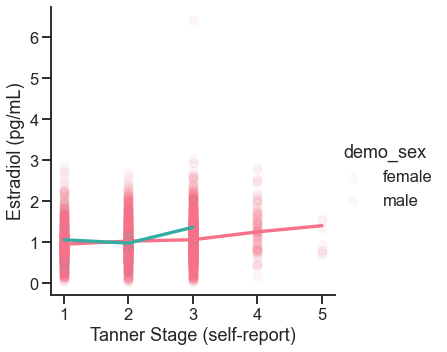

In [37]:
g = sns.lmplot(
    big_df.swaplevel(0).loc['baseline_year_1_arm_1'],
    x='pds_y_ss_category_2',
    y='filtered_hse',
    hue='demo_sex',
    scatter_kws=dict(alpha=0.05),
    #scatter=False,
    lowess=True,
    palette=husl
)
g.ax.set_ylabel('Estradiol (pg/mL)')
g.ax.set_xlabel('Tanner Stage (self-report)')

(-1.0, 1000.0)

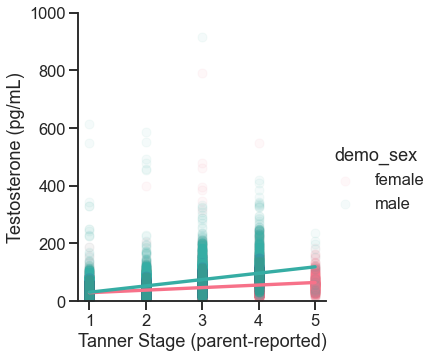

In [38]:
g = sns.lmplot(
    big_df,
    x='pds_p_ss_category_2',
    y='filtered_ert',
    hue='demo_sex',
    scatter_kws=dict(alpha=0.05),
    palette=husl
)
g.ax.set_xlabel('Tanner Stage (parent-reported)')
g.ax.set_ylabel('Testosterone (pg/mL)')
g.ax.set_ylim(-1,1000)

Text(51.21871657986111, 0.5, 'Testosterone (pg/mL)')

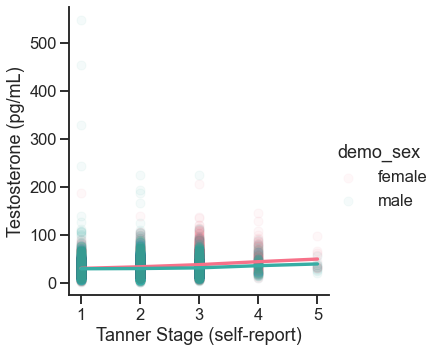

In [39]:
g = sns.lmplot(
    big_df.swaplevel(0).loc['baseline_year_1_arm_1'],
    x='pds_y_ss_category_2',
    y='filtered_ert',
    hue='demo_sex',
    scatter_kws=dict(alpha=0.05),
    #scatter=False,
    lowess=True,
    palette=husl
)
g.ax.set_xlabel('Tanner Stage (self-report)')
g.ax.set_ylabel('Testosterone (pg/mL)')

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


Text(51.21871657986111, 0.5, 'DHEA (pg/mL)')

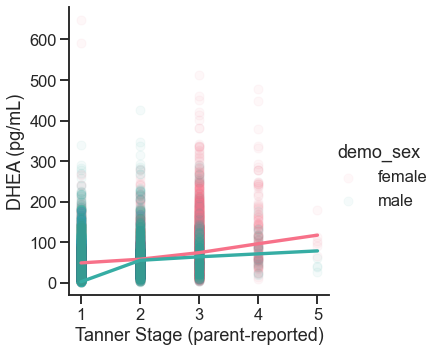

In [40]:
g = sns.lmplot(
    big_df.swaplevel(0).loc['baseline_year_1_arm_1'],
    x='pds_p_ss_category_2',
    y='filtered_dhea',
    hue='demo_sex',
    scatter_kws=dict(alpha=0.05),
    #scatter=False,
    lowess=True,
    palette=husl
)
g.ax.set_xlabel('Tanner Stage (parent-reported)')
g.ax.set_ylabel('DHEA (pg/mL)')

Text(51.21871657986111, 0.5, 'DHEA (pg/mL)')

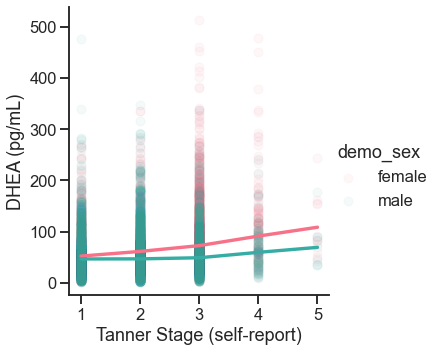

In [41]:
g = sns.lmplot(
    big_df.swaplevel(0).loc['baseline_year_1_arm_1'],
    x='pds_y_ss_category_2',
    y='filtered_dhea',
    hue='demo_sex',
    scatter_kws=dict(alpha=0.05),
    #scatter=False,
    lowess=True,
    palette=husl
)
g.ax.set_xlabel('Tanner Stage (self-report)')
g.ax.set_ylabel('DHEA (pg/mL)')

In [42]:
big_df.swaplevel(0).loc['baseline_year_1_arm_1']['filtered_hse'].isna().sum()

7381

In [43]:
df1[df1['hormone_sal_sex'] == 2]['hormone_scr_hse_rep1'].isna().sum()

18357

In [44]:
df1

hormone_sal_sex hormone_sal_wake_y  \
src_subject_id   eventname                                                      
NDAR_INV003RTV85 baseline_year_1_arm_1                   1              06:00   
                 1_year_follow_up_y_arm_1                1              08:00   
                 2_year_follow_up_y_arm_1                5                NaN   
                 3_year_follow_up_y_arm_1                5                NaN   
NDAR_INV005V6D2C baseline_year_1_arm_1                   1              07:00   
...                                                    ...                ...   
NDAR_INVZZZNB0XC baseline_year_1_arm_1                   1              08:00   
NDAR_INVZZZP87KR baseline_year_1_arm_1                   1              06:00   
                 1_year_follow_up_y_arm_1                1              08:15   
                 2_year_follow_up_y_arm_1                1              07:30   
                 4_year_follow_up_y_arm_1                1              06:00   

                                           hormone_sal_caff_y  \
src_subject_id   eventname                                      
NDAR_INV003RTV85 baseline_year_1_arm_1                    1.0   
                 1_year_follow_up_y_arm_1                 1.0   
                 2_year_follow_up_y_arm_1                 NaN   
                 3_year_follow_up_y_arm_1                 NaN   
NDAR_INV005V6D2C baseline_year_1_arm_1                    0.0   
...                                                       ...   
NDAR_INVZZZNB0XC baseline_year_1_arm_1                    0.0   
NDAR_INVZZZP87KR baseline_year_1_arm_1                    0.0   
                 1_year_follow_up_y_arm_1                 0.0   
                 2_year_follow_up_y_arm_1                 0.0   
                 4_year_follow_up_y_arm_1                 0.0   

                                           hormone_sal_caff_mg_y  \
src_subject_id   eventname                                         
NDAR_INV003RTV85 baseline_year_1_arm_1                      40.0   
                 1_year_follow_up_y_arm_1                  120.0   
                 2_year_follow_up_y_arm_1                    NaN   
                 3_year_follow_up_y_arm_1                    NaN   
NDAR_INV005V6D2C baseline_year_1_arm_1                       NaN   
...                                                          ...   
NDAR_INVZZZNB0XC baseline_year_1_arm_1                       NaN   
NDAR_INVZZZP87KR baseline_year_1_arm_1                       NaN   
                 1_year_follow_up_y_arm_1                    NaN   
                 2_year_follow_up_y_arm_1                    NaN   
                 4_year_follow_up_y_arm_1                    NaN   

                                           hormone_sal_active  \
src_subject_id   eventname                                      
NDAR_INV003RTV85 baseline_year_1_arm_1                    0.0   
                 1_year_follow_up_y_arm_1                 0.0   
                 2_year_follow_up_y_arm_1                 NaN   
                 3_year_follow_up_y_arm_1                 NaN   
NDAR_INV005V6D2C baseline_year_1_arm_1                    0.0   
...                                                       ...   
NDAR_INVZZZNB0XC baseline_year_1_arm_1                    0.0   
NDAR_INVZZZP87KR baseline_year_1_arm_1                    0.0   
                 1_year_follow_up_y_arm_1                 0.0   
                 2_year_follow_up_y_arm_1                 0.0   
                 4_year_follow_up_y_arm_1                 0.0   

                                           hormone_sal_active_minutes_y  \
src_subject_id   eventname                                                
NDAR_INV003RTV85 baseline_year_1_arm_1                              NaN   
                 1_year_follow_up_y_arm_1                           NaN   
                 2_year_follow_up_y_arm_1                           NaN   
                 3_year_follow_up_y_a